In [1]:
import sys
import numpy as np
import pandas as pd
import xarray as xr
#import warnings
#warnings.filterwarnings('ignore')

In [2]:
# automatic code formatting
%load_ext lab_black

# recognize changes in imported files without restarting kernel
%load_ext autoreload
%autoreload 2

# add s2stools to python path
paths = ["/project/meteo/work/Jonas.Spaeth/gitprojects/stos"]
for p in paths:
    sys.path.append(p)
# alternative:
# %pip install s2stools

# Open Files

In [4]:
import s2stools.process

In [5]:
# u60
print("u60...")
ds = s2stools.process.open_files(
    cf="_cf.nc",
    pf="_pf.nc",
    chc="_chc.nc",
    phc="_phc.nc",
    path_pattern="/project/meteo/work/Jonas.Spaeth/data/raw/s2s/ecmwf/u_10hpa_60/*2017*",
)
ds = ds.mean(["longitude", "latitude"]).rename(u="u60_10hpa")

u60...
realtime path:  /project/meteo/work/Jonas.Spaeth/data/raw/s2s/ecmwf/u_10hpa_60/*2017*_cf.nc
cf	 
pf	 
chc	 
phc	 


/project/meteo/work/Jonas.Spaeth/venvjonas/lib/python3.9/site-packages/dask/array/core.py:4360: PerformanceWarning: Increasing number of chunks by factor of 20
  result = blockwise(


# Plot average ensemble standard deviation

In [6]:
import s2stools.plot
import matplotlib.pyplot as plt


u60_ensstd = ds.u60_10hpa.std("number")

dimensions:
```python
ds.u60_10hpa  # reftime, hc_year, number, leadtime
u60_ensstd  # reftime, hc_year, leadtime
u60_ensstd_stacked  # fc, leadtime
u60_ensstd_stacked.mean("fc")  # leadtime
```

In [8]:
u60_ensstd_stacked = s2stools.process.stack_ensfc(u60_ensstd)

/project/meteo/work/Jonas.Spaeth/venvjonas/lib/python3.9/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


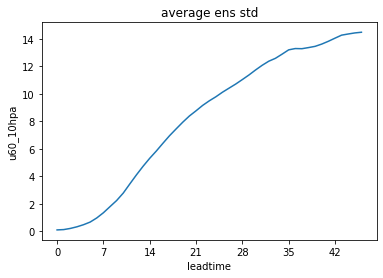

In [10]:
u60_ensstd_stacked.mean("fc").plot()

# ax = plt.gca()
# s2stools.plot.xaxis_unit_days(ax, multiple=7)
# ax.set_title("average ens std")
# plt.show()